# Weather Prediction - Week 07 - Spiced Data Science Bootcamp - Valentin Lorenzen

## Initialization

In [587]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [588]:
# loading data
df = pd.read_csv("data/TG_STAID002759.txt", parse_dates=True, index_col=1)

In [589]:
# clean column names
df.columns = ['SOUID', 'temp', 'Q_temp']

In [590]:
# drop unnecessary columns
df.drop(['SOUID', 'Q_temp'], axis=1, inplace=True)

In [591]:
# multiply temperature feature by 0.1
df['temp'] = df['temp'] * 0.1

In [592]:
# add date columns
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [593]:
# drop everything before 1945 because of missing values
df = df.loc[df['year']>1945]

In [594]:
weather

temp  year  month  day  timestep      trend
    DATE                                               
1946-01-01  -3.4  1946      1    1         0   9.619983
1946-01-02  -3.0  1946      1    2         1   9.619901
1946-01-03  -2.8  1946      1    3         2   9.619820
1946-01-04  -2.7  1946      1    4         3   9.619738
1946-01-05   1.4  1946      1    5         4   9.619656
...          ...   ...    ...  ...       ...        ...
2021-08-30  15.8  2021      8   30     27635  11.449848
2021-08-31  16.2  2021      8   31     27636  11.450062
2021-09-01  16.0  2021      9    1     27637  11.450276
2021-09-02  16.1  2021      9    2     27638  11.450490
2021-09-03  16.9  2021      9    3     27639  11.450704

[27640 rows x 6 columns]

In [859]:
# split data
weather = df

## EDA

<AxesSubplot:xlabel='    DATE', ylabel='temp'>

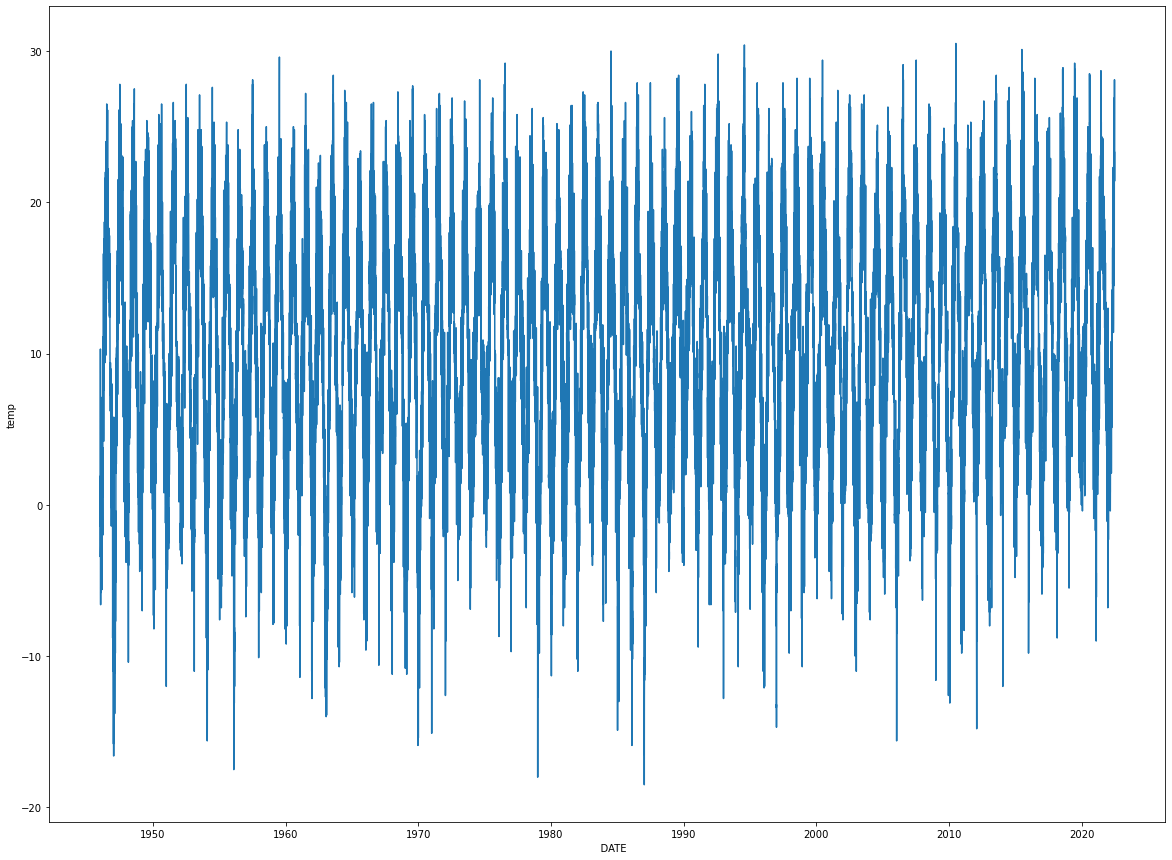

In [860]:
# Temperature over the years
fig = plt.gcf()
fig.set_size_inches(20, 15)
sns.lineplot(data=weather, x=weather.index, y="temp")

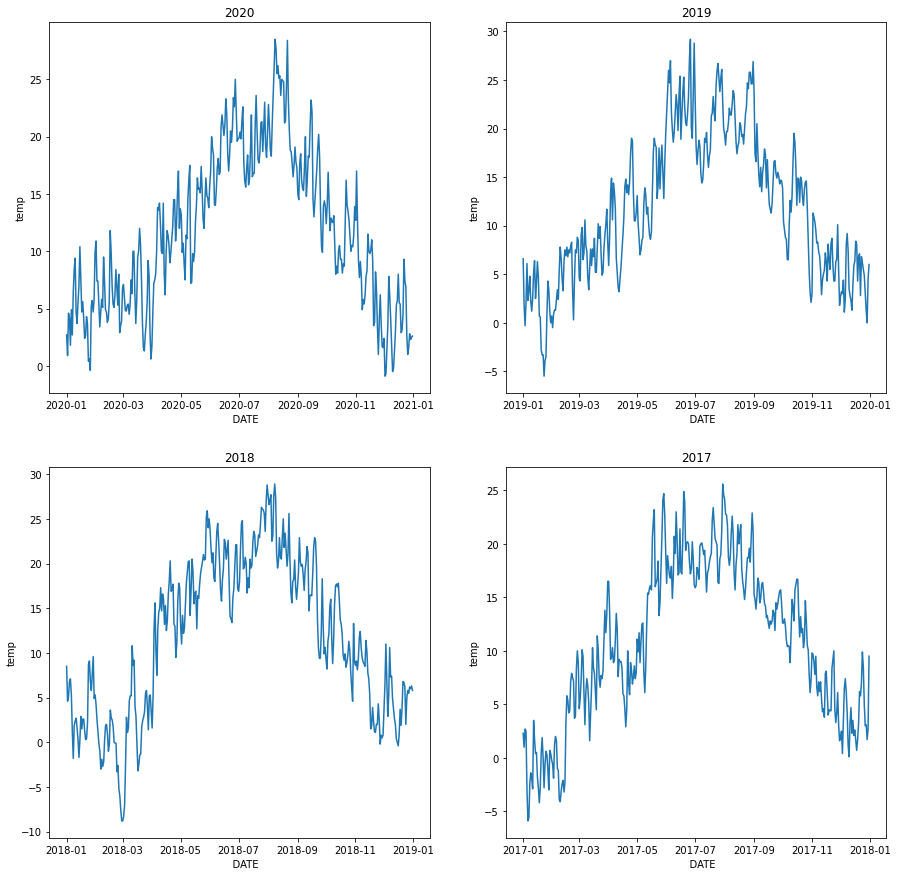

In [861]:
fig, ax = plt.subplots(2, 2, figsize=[15,15])

sns.lineplot(data=weather.loc[df['year']==2020], x=weather.loc[df['year']==2020].index, y="temp", ax=ax[0,0])

sns.lineplot(data=weather.loc[df['year']==2019], x=weather.loc[df['year']==2019].index, y="temp", ax=ax[0,1])

sns.lineplot(data=weather.loc[df['year']==2018], x=weather.loc[df['year']==2018].index, y="temp", ax=ax[1,0])

sns.lineplot(data=weather.loc[df['year']==2017], x=weather.loc[df['year']==2017].index, y="temp", ax=ax[1,1])

ax[0,0].title.set_text('2020')

ax[0,1].title.set_text('2019')

ax[1,0].title.set_text('2018')

ax[1,1].title.set_text('2017')



<AxesSubplot:xlabel='    DATE', ylabel='temp'>

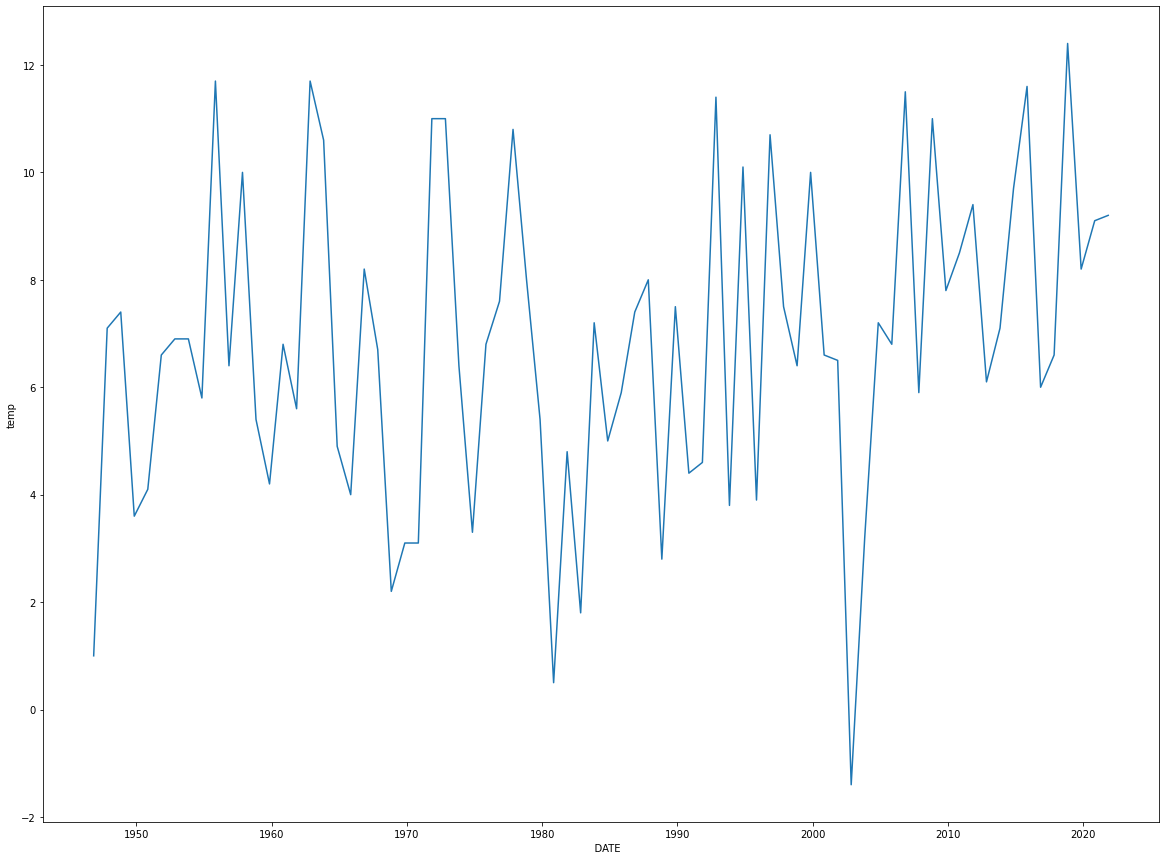

In [862]:
fig = plt.gcf()
fig.set_size_inches(20, 15)
sns.lineplot(data=weather.loc[weather['month']==11].loc[weather['day']==6], x=weather.loc[weather['month']==11].loc[weather['day']==6].index, y="temp")

## Linear Regression

In [863]:
from sklearn.preprocessing import PolynomialFeatures

In [864]:
weather['timestep'] = list(range(len(weather)))

In [865]:
y_trend = weather.copy().iloc[:,0]
X_trend = weather.copy()['timestep'].values.reshape(-1,1)

In [866]:
pt = PolynomialFeatures(degree=2, include_bias=False)

In [867]:
X_trend

array([[    0],
       [    1],
       [    2],
       ...,
       [27937],
       [27938],
       [27939]])

In [868]:
X_trend_pt = pt.fit_transform(X_trend)

In [869]:
X_trend_df = pd.DataFrame(X_trend_pt)

In [870]:
X_trend_df

0            1
0          0.0          0.0
1          1.0          1.0
2          2.0          4.0
3          3.0          9.0
4          4.0         16.0
...        ...          ...
27935  27935.0  780364225.0
27936  27936.0  780420096.0
27937  27937.0  780475969.0
27938  27938.0  780531844.0
27939  27939.0  780587721.0

[27940 rows x 2 columns]

In [871]:
trend_model = LinearRegression()

In [872]:
trend_model.fit(X_trend_df, y_trend)

LinearRegression()

In [873]:
weather['trend'] = trend_model.predict(X_trend_df)

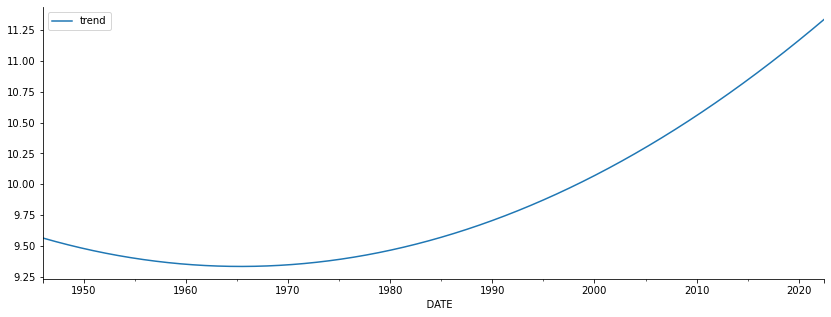

In [874]:
weather[['trend']].plot(figsize=(14,5),legend=True)
sns.despine()

In [876]:
X_trend_future = [[27940], [27941], [27942], [27943]]

In [877]:
X_trend_future_df = pd.DataFrame(X_trend_future)

In [878]:
X_trend_future_df_pt = pt.transform(X_trend_future_df)

In [879]:
X_trend_future_df_pt

array([[2.79400000e+04, 7.80643600e+08],
       [2.79410000e+04, 7.80699481e+08],
       [2.79420000e+04, 7.80755364e+08],
       [2.79430000e+04, 7.80811249e+08]])

In [880]:
X_trend_future_df

0
0  27940
1  27941
2  27942
3  27943

In [881]:
trend_prediction = trend_model.predict(X_trend_future_df_pt)

In [882]:
trend_prediction

array([11.33834732, 11.3385396 , 11.33873189, 11.33892419])

In [883]:
weather['detrended'] = weather['temp'] - weather['trend']

In [884]:
seasonal_dummies = pd.get_dummies(weather.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(weather.index)

weather = pd.concat([weather, seasonal_dummies], axis=1)

In [885]:
weather.columns

Index(['temp', 'year', 'month', 'day', 'timestep', 'trend', 'detrended',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [886]:
X_seasonality = weather[weather.columns[-11:]]
X_seasonality['timestep'] = weather['timestep']
y_seasonality = weather['detrended']

/tmp/ipykernel_26297/189546969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_seasonality['timestep'] = weather['timestep']


In [887]:
X_seasonality

month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
    DATE                                                                    
1946-01-01        0        0        0        0        0        0        0   
1946-01-02        0        0        0        0        0        0        0   
1946-01-03        0        0        0        0        0        0        0   
1946-01-04        0        0        0        0        0        0        0   
1946-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2022-06-26        0        0        0        0        1        0        0   
2022-06-27        0        0        0        0        1        0        0   
2022-06-28        0        0        0        0        1        0        0   
2022-06-29        0        0        0        0        1        0        0   
2022-06-30        0        0        0        0        1        0        0   

            month_9  month_10  month_11  month_12  timestep  
    DATE                                                     
1946-01-01        0         0         0         0         0  
1946-01-02        0         0         0         0         1  
1946-01-03        0         0         0         0         2  
1946-01-04        0         0         0         0         3  
1946-01-05        0         0         0         0         4  
...             ...       ...       ...       ...       ...  
2022-06-26        0         0         0         0     27935  
2022-06-27        0         0         0         0     27936  
2022-06-28        0         0         0         0     27937  
2022-06-29        0         0         0         0     27938  
2022-06-30        0         0         0         0     27939  

[27940 rows x 12 columns]

In [888]:
seasonality_model = LinearRegression()

In [889]:
seasonality_model.fit(X_seasonality, y_seasonality)

LinearRegression()

In [890]:
X_seasonality

month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
    DATE                                                                    
1946-01-01        0        0        0        0        0        0        0   
1946-01-02        0        0        0        0        0        0        0   
1946-01-03        0        0        0        0        0        0        0   
1946-01-04        0        0        0        0        0        0        0   
1946-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2022-06-26        0        0        0        0        1        0        0   
2022-06-27        0        0        0        0        1        0        0   
2022-06-28        0        0        0        0        1        0        0   
2022-06-29        0        0        0        0        1        0        0   
2022-06-30        0        0        0        0        1        0        0   

            month_9  month_10  month_11  month_12  timestep  
    DATE                                                     
1946-01-01        0         0         0         0         0  
1946-01-02        0         0         0         0         1  
1946-01-03        0         0         0         0         2  
1946-01-04        0         0         0         0         3  
1946-01-05        0         0         0         0         4  
...             ...       ...       ...       ...       ...  
2022-06-26        0         0         0         0     27935  
2022-06-27        0         0         0         0     27936  
2022-06-28        0         0         0         0     27937  
2022-06-29        0         0         0         0     27938  
2022-06-30        0         0         0         0     27939  

[27940 rows x 12 columns]

In [891]:
X_trend_season = [[0,0,0,0,0,1,0,0,0,0,0]]*4
X_trend_season_df = pd.DataFrame(X_trend_season)

In [892]:
X_trend_season_df['timestep'] = [27940, 27941, 27942, 27943]

In [893]:
X_trend_season_df

0  1  2  3  4  5  6  7  8  9  10  timestep
0  0  0  0  0  0  1  0  0  0  0   0     27940
1  0  0  0  0  0  1  0  0  0  0   0     27941
2  0  0  0  0  0  1  0  0  0  0   0     27942
3  0  0  0  0  0  1  0  0  0  0   0     27943

In [894]:
X_fit_data = seasonality_model.predict(X_seasonality)

In [895]:
seasonality_prediction = seasonality_model.predict(X_trend_season_df)

/home/valentin/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/valentin/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [896]:
X_fit_data

array([-9.43365064, -9.43365052, -9.4336504 , ...,  7.91803447,
        7.91803459,  7.91803471])

In [897]:
seasonality_prediction

array([9.59264076, 9.59264089, 9.59264101, 9.59264113])

In [898]:
weather['seasonality'] = seasonality_model.predict(X_seasonality)

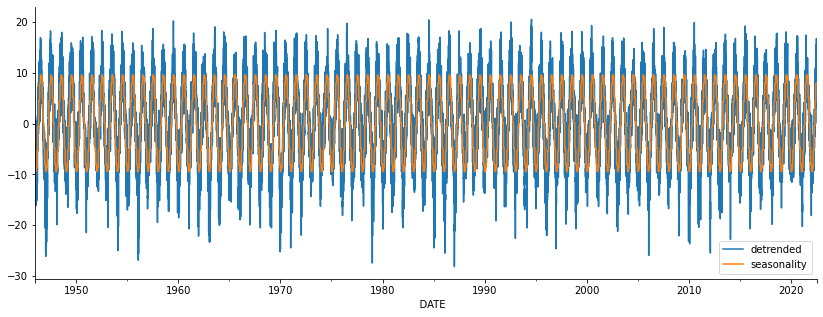

In [899]:
weather[['detrended','seasonality']].plot(figsize=(14,5),legend=True)
sns.despine()

In [900]:
weather['trend_seasonal'] = weather['trend'] + weather['seasonality']

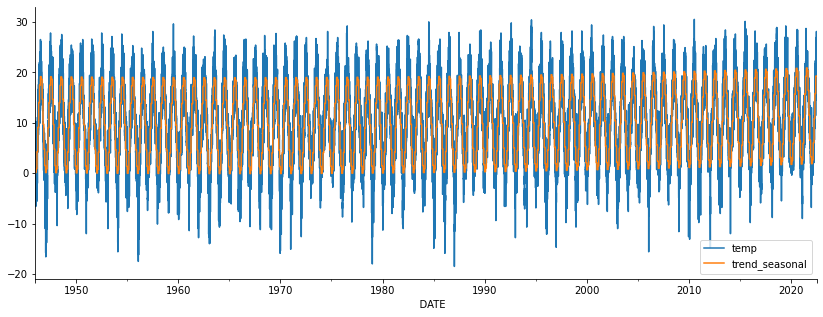

In [901]:
weather[['temp','trend_seasonal']].plot(figsize=(14,5),legend=True)
sns.despine()

In [902]:
weather['remainder'] = weather['temp'] - weather['trend_seasonal']

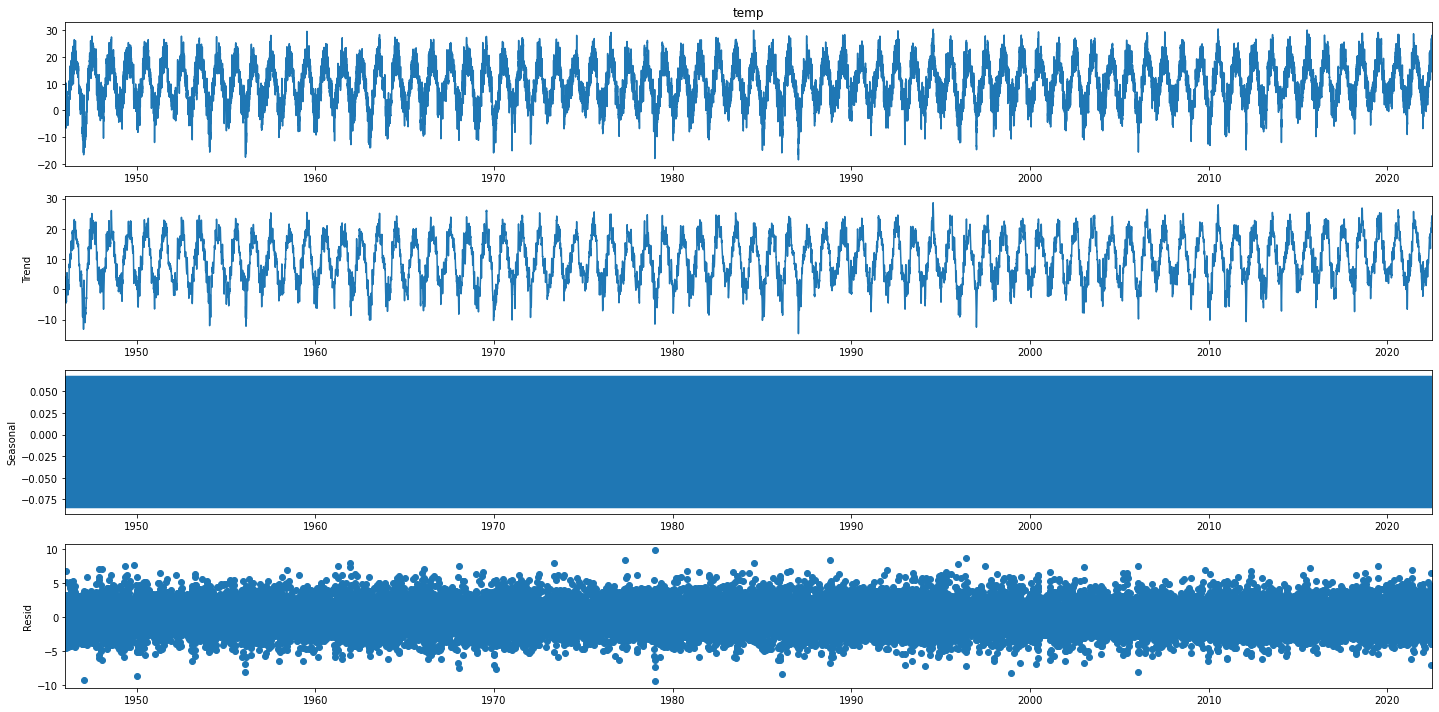

In [903]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(df['temp'], model='additive')

plt.rcParams['figure.figsize'] = (20,10)
sd.plot()
None

/home/valentin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/valentin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/valentin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

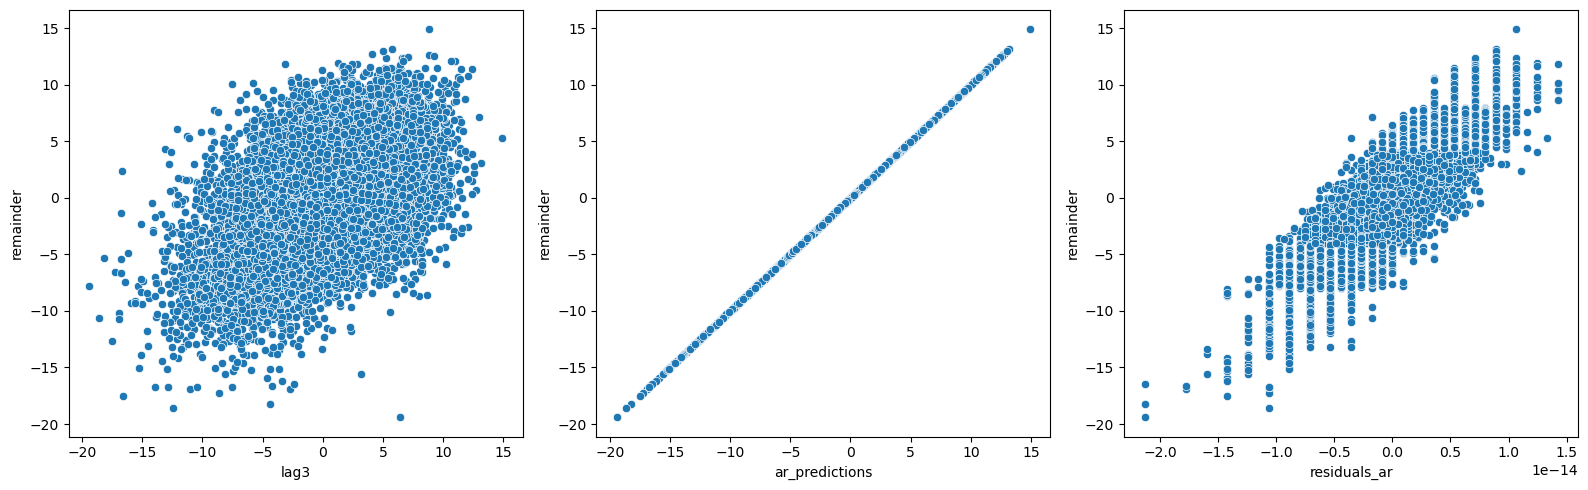

In [904]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style

lag_columns = weather_remainder.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(weather_remainder[lag_columns[i]],weather_remainder['remainder'],ax=axes[i])
    
plt.tight_layout()

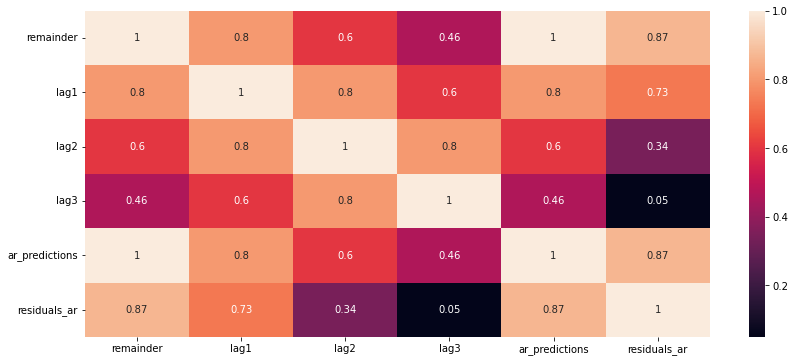

In [905]:
plt.rcParams['figure.figsize'] = (14,6)
sns.heatmap(round(weather_remainder.corr(),2), annot=True)
None

In [906]:
weather_remainder.dropna(inplace=True)
weather_remainder.head()

/tmp/ipykernel_26297/2669563194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_remainder.dropna(inplace=True)


remainder      lag1      lag2      lag3  ar_predictions  \
    DATE                                                              
1946-01-04  -2.820413 -2.920467 -3.120520 -3.520573       -2.820413   
1946-01-05   1.279640 -2.820413 -2.920467 -3.120520        1.279640   
1946-01-06   1.779693  1.279640 -2.820413 -2.920467        1.779693   
1946-01-07   0.279746  1.779693  1.279640 -2.820413        0.279746   
1946-01-08  -1.520201  0.279746  1.779693  1.279640       -1.520201   

            residuals_ar  
    DATE                  
1946-01-04 -1.332268e-15  
1946-01-05  1.776357e-15  
1946-01-06  3.552714e-15  
1946-01-07  2.275957e-15  
1946-01-08 -1.554312e-15

In [907]:
X_remainder = weather_remainder[lag_columns]
y_remainder = weather_remainder['remainder']

In [908]:
ar_model = LinearRegression()
ar_model.fit(X_remainder,y_remainder)

LinearRegression()

In [909]:
weather_remainder['ar_predictions'] = ar_model.predict(X_remainder)

/tmp/ipykernel_26297/2406550059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_remainder['ar_predictions'] = ar_model.predict(X_remainder)


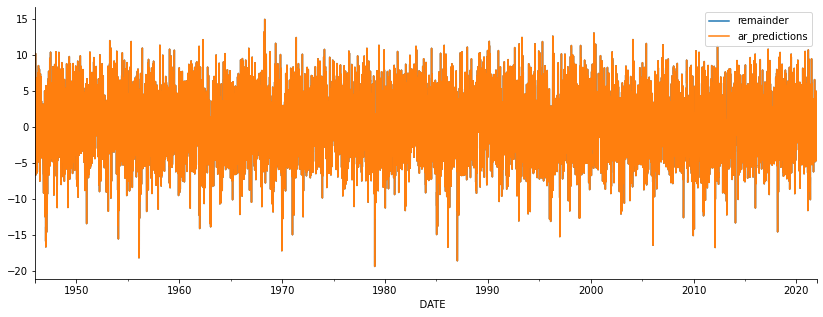

In [910]:
weather_remainder[['remainder','ar_predictions']].plot(figsize=(14,5),legend=True)
sns.despine()

In [911]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0, 0.5, 'Autocorrelation')

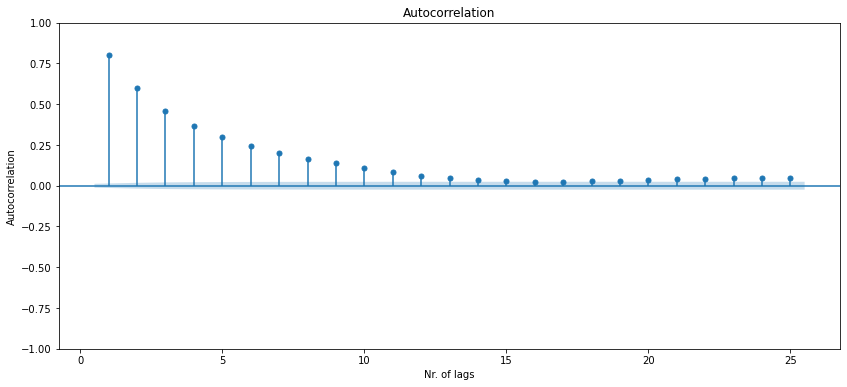

In [912]:
plot_acf(weather_remainder['remainder'],zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Autocorrelation')

/home/valentin/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


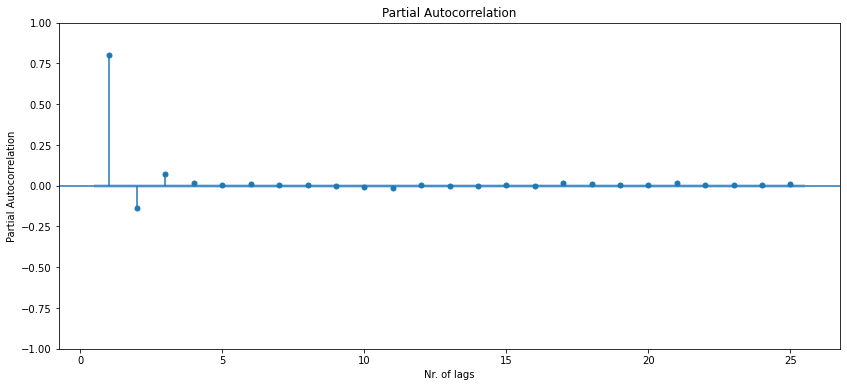

In [913]:
plot_pacf(weather_remainder['remainder'],zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Partial Autocorrelation')
None

In [914]:
weather_remainder['residuals_ar'] = weather_remainder['remainder'] - weather_remainder['ar_predictions']

/tmp/ipykernel_26297/1351734198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_remainder['residuals_ar'] = weather_remainder['remainder'] - weather_remainder['ar_predictions']


In [915]:
import pmdarima as pm

In [916]:
remainder_model = pm.auto_arima(
    weather['remainder'],
    start_p=0,
    max_p=3,
    seasonality = False,
    stationarity = True,
    trace = True,
    n_jobs=-1
)

/home/valentin/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=130345.737, Time=6.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=155807.564, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126791.796, Time=2.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=136639.380, Time=5.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=155805.564, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126240.130, Time=2.73 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126090.900, Time=4.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=126081.154, Time=23.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=126132.541, Time=12.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=126082.268, Time=7.92 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=126085.559, Time=22.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=126079.154, Time=4.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=126130.541, Time=2.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126088.900, Time=0.85 sec
 A

In [811]:
remainder_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27575
Model:               SARIMAX(3, 0, 1)   Log Likelihood              -62251.577
Date:                Fri, 12 Aug 2022   AIC                         124513.153
Time:                        16:21:02   BIC                         124554.277
Sample:                             0   HQIC                        124526.402
                              - 27575                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2180      0.070     17.477      0.000       1.081       1.355
ar.L2         -0.4734      0.063     -7.521      0.000      -0.597      -0.350
ar.L3          0.1137      0.010     11.485      0.000       0.094       0.133
ma.L1         -0.2934      0.070     -4.185      0.000      -0.431      -0.156
sigma2         5.3500      0.040    133.469      0.000       5.271       5.429
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               600.28
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [842]:
remainder_forecast = remainder_model.predict(4, return_conf_int=False)

In [843]:
timestamp = np.arange(len(weather) + len(remainder_forecast))

In [844]:
weather['full_prediction_autoarima'] = remainder_model.predict_in_sample()

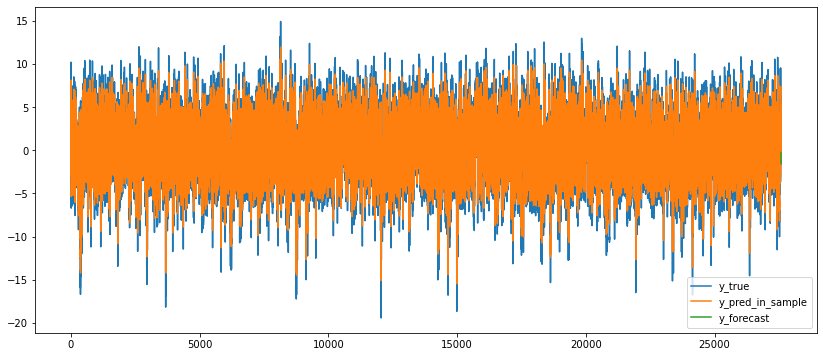

In [845]:
plt.plot(timestamp[:len(weather)], weather['remainder'], label='y_true')
plt.plot(timestamp[:len(weather)], weather['full_prediction_autoarima'], label='y_pred_in_sample')
plt.plot(timestamp[len(weather):], remainder_forecast, label='y_forecast')
plt.legend()
None

In [846]:
weather['full_prediction_autoarima'] = remainder_model.predict_in_sample()

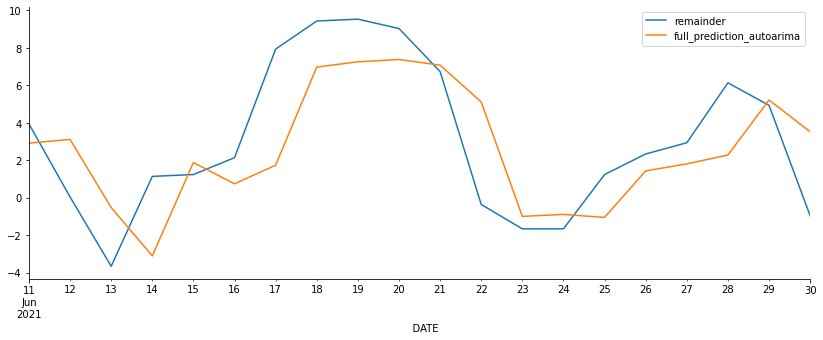

In [847]:
weather[['remainder', 'full_prediction_autoarima']][-20:].plot(figsize=(14,5),legend=True)
sns.despine()

In [848]:
remainder_forecast

array([-1.4985039 , -0.80711955, -0.38344272, -0.25524486])

In [850]:
final_prediction = trend_prediction + seasonality_prediction + remainder_forecast

In [851]:
print(trend_prediction, seasonality_prediction, remainder_forecast)

[11.26584421 11.26603281 11.26622142 11.26641004] [9.58883396 9.5888341  9.58883424 9.58883438] [-1.4985039  -0.80711955 -0.38344272 -0.25524486]


In [917]:
print(final_prediction)

[19.35617427 20.04774736 20.47161294 20.59999956]


In [924]:
print('Final prediction for tomorrow: ', round(final_prediction[0], 2), "C")
print('Final prediction for the day after tomorrow: ', round(final_prediction[1], 2), "C")

Final prediction for tomorrow:  19.36 C
Final prediction for the day after tomorrow:  20.05 C


# Other stuff

In [918]:
weather.tail()

temp  year  month  day  timestep      trend  detrended  month_2  \
    DATE                                                                      
2022-06-26  26.3  2022      6   26     27935  11.337386  14.962614        0   
2022-06-27  28.1  2022      6   27     27936  11.337578  16.762422        0   
2022-06-28  21.4  2022      6   28     27937  11.337771  10.062229        0   
2022-06-29  21.4  2022      6   29     27938  11.337963  10.062037        0   
2022-06-30  23.3  2022      6   30     27939  11.338155  11.961845        0   

            month_3  month_4  ...  month_6  month_7  month_8  month_9  \
    DATE                      ...                                       
2022-06-26        0        0  ...        1        0        0        0   
2022-06-27        0        0  ...        1        0        0        0   
2022-06-28        0        0  ...        1        0        0        0   
2022-06-29        0        0  ...        1        0        0        0   
2022-06-30        0        0  ...        1        0        0        0   

            month_10  month_11  month_12  seasonality  trend_seasonal  \
    DATE                                                                
2022-06-26         0         0         0     7.918034       19.255420   
2022-06-27         0         0         0     7.918034       19.255613   
2022-06-28         0         0         0     7.918034       19.255805   
2022-06-29         0         0         0     7.918035       19.255997   
2022-06-30         0         0         0     7.918035       19.256190   

            remainder  
    DATE               
2022-06-26   7.044580  
2022-06-27   8.844387  
2022-06-28   2.144195  
2022-06-29   2.144003  
2022-06-30   4.043810  

[5 rows x 21 columns]

In [919]:
weather_remainder_remainder_test

temp  year  month  day
    DATE                          
2021-07-01  15.7  2021      7    1
2021-07-02  19.9  2021      7    2
2021-07-03  20.3  2021      7    3
2021-07-04  22.5  2021      7    4
2021-07-05  20.5  2021      7    5
...          ...   ...    ...  ...
2022-06-26  26.3  2022      6   26
2022-06-27  28.1  2022      6   27
2022-06-28  21.4  2022      6   28
2022-06-29  21.4  2022      6   29
2022-06-30  23.3  2022      6   30

[365 rows x 4 columns]

In [920]:
final_prediction_comparison_df = weather_remainder_remainder_test[:4]

In [921]:
final_prediction_comparison_df.drop(['year', 'month', 'day'], axis=1, inplace=True)

/home/valentin/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [856]:
final_prediction_comparison_df['prediction'] = final_prediction

/tmp/ipykernel_26297/1043930513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prediction_comparison_df['prediction'] = final_prediction


In [857]:
weather_remainder_remainder_test.head(5)

temp  year  month  day
    DATE                          
2021-07-01  15.7  2021      7    1
2021-07-02  19.9  2021      7    2
2021-07-03  20.3  2021      7    3
2021-07-04  22.5  2021      7    4
2021-07-05  20.5  2021      7    5

In [858]:
final_prediction_comparison_df

temp  prediction
    DATE                    
2021-07-01  15.7   19.356174
2021-07-02  19.9   20.047747
2021-07-03  20.3   20.471613
2021-07-04  22.5   20.600000

In [708]:
import numpy as np
timestamp = np.arange(len(weather_remainder) + len(y_forecast))

In [ ]:
weather

temp  year  month  day  timestep      trend  detrended  month_2  \
    DATE                                                                      
1946-01-01  -3.4  1946      1    1         0   8.979862 -12.379862        0   
1946-01-02  -3.0  1946      1    2         1   8.979924 -11.979924        0   
1946-01-03  -2.8  1946      1    3         2   8.979985 -11.779985        0   
1946-01-04  -2.7  1946      1    4         3   8.980047 -11.680047        0   
1946-01-05   1.4  1946      1    5         4   8.980109  -7.580109        0   
...          ...   ...    ...  ...       ...        ...        ...      ...   
2021-06-26  21.5  2021      6   26     27570  10.682571  10.817429        0   
2021-06-27  22.1  2021      6   27     27571  10.682633  11.417367        0   
2021-06-28  25.3  2021      6   28     27572  10.682695  14.617305        0   
2021-06-29  24.1  2021      6   29     27573  10.682756  13.417244        0   
2021-06-30  18.2  2021      6   30     27574  10.682818   7.517182        0   

            month_3  month_4  ...  month_7  month_8  month_9  month_10  \
    DATE                      ...                                        
1946-01-01        0        0  ...        0        0        0         0   
1946-01-02        0        0  ...        0        0        0         0   
1946-01-03        0        0  ...        0        0        0         0   
1946-01-04        0        0  ...        0        0        0         0   
1946-01-05        0        0  ...        0        0        0         0   
...             ...      ...  ...      ...      ...      ...       ...   
2021-06-26        0        0  ...        0        0        0         0   
2021-06-27        0        0  ...        0        0        0         0   
2021-06-28        0        0  ...        0        0        0         0   
2021-06-29        0        0  ...        0        0        0         0   
2021-06-30        0        0  ...        0        0        0         0   

            month_11  month_12  seasonality  trend_seasonal  remainder  \
    DATE                                                                 
1946-01-01         0         0    -9.452839       -0.472977  -2.927023   
1946-01-02         0         0    -9.452839       -0.472915  -2.527085   
1946-01-03         0         0    -9.452839       -0.472853  -2.327147   
1946-01-04         0         0    -9.452839       -0.472792  -2.227208   
1946-01-05         0         0    -9.452839       -0.472730   1.872730   
...              ...       ...          ...             ...        ...   
2021-06-26         0         0     7.902243       18.584814   2.915186   
2021-06-27         0         0     7.902243       18.584876   3.515124   
2021-06-28         0         0     7.902243       18.584937   6.715063   
2021-06-29         0         0     7.902243       18.584999   5.515001   
2021-06-30         0         0     7.902243       18.585061  -0.385061   

            full_prediction_autoarima  
    DATE                               
1946-01-01                   0.000000  
1946-01-02                  -2.927024  
1946-01-03                  -2.501853  
1946-01-04                  -2.380130  
1946-01-05                  -2.304288  
...                               ...  
2021-06-26                   2.574835  
2021-06-27                   3.034655  
2021-06-28                   3.032206  
2021-06-29                   5.984670  
2021-06-30                   4.062233  

[27575 rows x 22 columns]

In [ ]:
weather['ar_predictions'] = weather_remainder['ar_predictions']
weather.dropna(inplace=True)
weather

temp  year  month  day  timestep      trend  detrended  month_2  \
    DATE                                                                      
1946-01-04  -2.7  1946      1    4         3   8.980047 -11.680047        0   
1946-01-05   1.4  1946      1    5         4   8.980109  -7.580109        0   
1946-01-06   1.9  1946      1    6         5   8.980171  -7.080171        0   
1946-01-07   0.4  1946      1    7         6   8.980232  -8.580232        0   
1946-01-08  -1.4  1946      1    8         7   8.980294 -10.380294        0   
...          ...   ...    ...  ...       ...        ...        ...      ...   
2021-06-26  21.5  2021      6   26     27570  10.682571  10.817429        0   
2021-06-27  22.1  2021      6   27     27571  10.682633  11.417367        0   
2021-06-28  25.3  2021      6   28     27572  10.682695  14.617305        0   
2021-06-29  24.1  2021      6   29     27573  10.682756  13.417244        0   
2021-06-30  18.2  2021      6   30     27574  10.682818   7.517182        0   

            month_3  month_4  ...  month_7  month_8  month_9  month_10  \
    DATE                      ...                                        
1946-01-04        0        0  ...        0        0        0         0   
1946-01-05        0        0  ...        0        0        0         0   
1946-01-06        0        0  ...        0        0        0         0   
1946-01-07        0        0  ...        0        0        0         0   
1946-01-08        0        0  ...        0        0        0         0   
...             ...      ...  ...      ...      ...      ...       ...   
2021-06-26        0        0  ...        0        0        0         0   
2021-06-27        0        0  ...        0        0        0         0   
2021-06-28        0        0  ...        0        0        0         0   
2021-06-29        0        0  ...        0        0        0         0   
2021-06-30        0        0  ...        0        0        0         0   

            month_11  month_12  seasonality  trend_seasonal  remainder  \
    DATE                                                                 
1946-01-04         0         0    -9.452839       -0.472792  -2.227208   
1946-01-05         0         0    -9.452839       -0.472730   1.872730   
1946-01-06         0         0    -9.452839       -0.472668   2.372668   
1946-01-07         0         0    -9.452839       -0.472606   0.872606   
1946-01-08         0         0    -9.452839       -0.472544  -0.927456   
...              ...       ...          ...             ...        ...   
2021-06-26         0         0     7.902243       18.584814   2.915186   
2021-06-27         0         0     7.902243       18.584876   3.515124   
2021-06-28         0         0     7.902243       18.584937   6.715063   
2021-06-29         0         0     7.902243       18.584999   5.515001   
2021-06-30         0         0     7.902243       18.585061  -0.385061   

            ar_predictions  
    DATE                    
1946-01-04       -1.852340  
1946-01-05       -1.771323  
1946-01-06        2.023964  
1946-01-07        1.647313  
1946-01-08        0.457661  
...                    ...  
2021-06-26        1.826739  
2021-06-27        2.247004  
2021-06-28        2.791149  
2021-06-29        5.715496  
2021-06-30        3.985936  

[27572 rows x 22 columns]

In [ ]:
X_final = weather[['trend', 'seasonality', 'ar_predictions']]
y_final = weather['temp']

In [ ]:
X_final

trend  seasonality  ar_predictions
    DATE                                          
1946-01-04   8.980047    -9.452839       -1.852340
1946-01-05   8.980109    -9.452839       -1.771323
1946-01-06   8.980171    -9.452839        2.023964
1946-01-07   8.980232    -9.452839        1.647313
1946-01-08   8.980294    -9.452839        0.457661
...               ...          ...             ...
2021-06-26  10.682571     7.902243        1.826739
2021-06-27  10.682633     7.902243        2.247004
2021-06-28  10.682695     7.902243        2.791149
2021-06-29  10.682756     7.902243        5.715496
2021-06-30  10.682818     7.902243        3.985936

[27572 rows x 3 columns]

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X_final, y_final)

LinearRegression()

In [ ]:
weather['result'] = final_model.predict(X_final)

<AxesSubplot:xlabel='    DATE'>

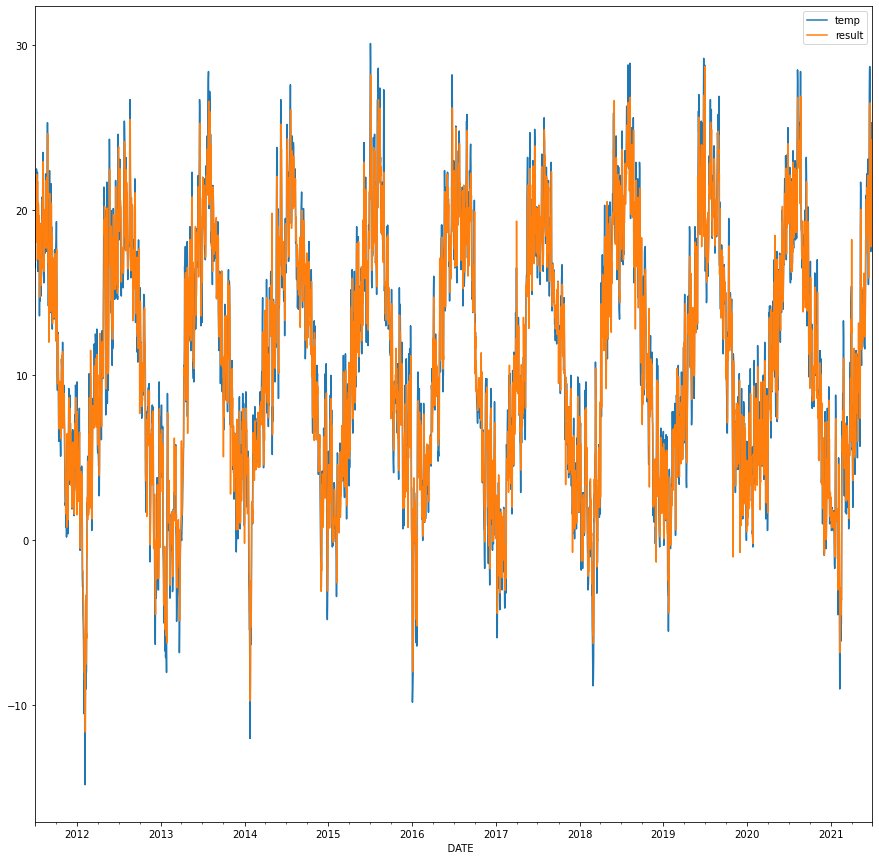

In [ ]:
weather[['temp', 'result']][-3650:].plot(figsize=(15,15), legend=True)

## Facebook Prophet

In [ ]:
from prophet import Prophet
import pandas as pd

In [ ]:
df_auto = pd.read_csv("data/TG_STAID002759.txt", parse_dates=True)

In [ ]:
df_auto.columns = ['1', 'ds', 'y', '2']

In [ ]:
df_auto.drop(['1', '2'], axis=1, inplace=True)

In [ ]:
df_auto['ds'] = pd.to_datetime(df_auto['ds'], format="%Y%m%d")
df_auto['y'] = df_auto['y'] * 0.1

In [ ]:
df_auto = df_auto[-18250:]

In [ ]:
365*50

18250

In [ ]:
pr = Prophet(yearly_seasonality=True)

In [ ]:
pr.fit(df_auto)

12:14:12 - cmdstanpy - INFO - Chain [1] start processing
12:14:15 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = pr.make_future_dataframe(periods=365)
future.tail()

ds
18610 2023-06-26
18611 2023-06-27
18612 2023-06-28
18613 2023-06-29
18614 2023-06-30

In [ ]:
forecast = pr.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
18250 2022-07-01  20.343423   15.556390   25.145290
18251 2022-07-02  20.335896   15.230940   25.028592
18252 2022-07-03  20.447563   15.693290   25.094215
18253 2022-07-04  20.622231   15.714015   25.350661
18254 2022-07-05  20.665711   15.486188   25.595875

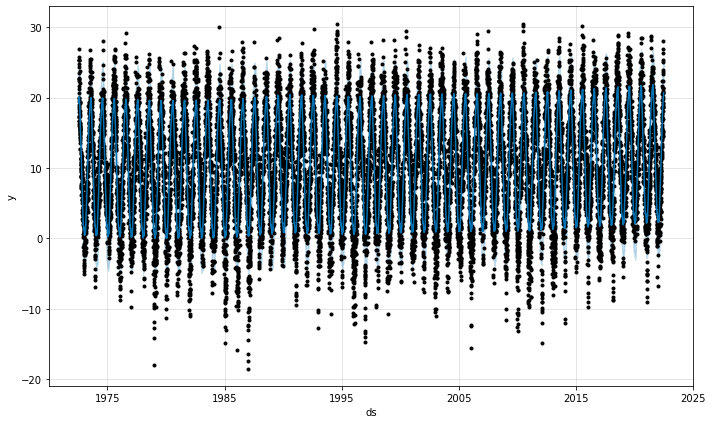

In [ ]:
fig1 = pr.plot(forecast)

In [ ]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     1972-07-13   9.799406   14.410862   24.362704     9.799406     9.799406   
1     1972-07-14   9.799200   14.183491   23.574998     9.799200     9.799200   
2     1972-07-15   9.798993   14.203584   23.970756     9.798993     9.798993   
3     1972-07-16   9.798787   14.540361   24.193686     9.798787     9.798787   
4     1972-07-17   9.798581   14.833059   24.587113     9.798581     9.798581   
...          ...        ...         ...         ...          ...          ...   
18250 2022-07-01  11.644450   15.556390   25.145290    11.644450    11.644450   
18251 2022-07-02  11.644750   15.230940   25.028592    11.644750    11.644750   
18252 2022-07-03  11.645050   15.693290   25.094215    11.645050    11.645050   
18253 2022-07-04  11.645350   15.714015   25.350661    11.645350    11.645350   
18254 2022-07-05  11.645650   15.486188   25.595875    11.645650    11.645650   

       additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0            9.473171              9.473171              9.473171  0.044098   
1            9.443240              9.443240              9.443240 -0.038904   
2            9.428738              9.428738              9.428738 -0.106473   
3            9.534528              9.534528              9.534528 -0.053713   
4            9.704259              9.704259              9.704259  0.063104   
...               ...                   ...                   ...       ...   
18250        8.698973              8.698973              8.698973 -0.038904   
18251        8.691147              8.691147              8.691147 -0.106473   
18252        8.802513              8.802513              8.802513 -0.053713   
18253        8.976881              8.976881              8.976881  0.063104   
18254        9.020060              9.020060              9.020060  0.049695   

       weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0          0.044098      0.044098  9.429073      9.429073      9.429073   
1         -0.038904     -0.038904  9.482143      9.482143      9.482143   
2         -0.106473     -0.106473  9.535211      9.535211      9.535211   
3         -0.053713     -0.053713  9.588241      9.588241      9.588241   
4          0.063104      0.063104  9.641155      9.641155      9.641155   
...             ...           ...       ...           ...           ...   
18250     -0.038904     -0.038904  8.737876      8.737876      8.737876   
18251     -0.106473     -0.106473  8.797620      8.797620      8.797620   
18252     -0.053713     -0.053713  8.856226      8.856226      8.856226   
18253      0.063104      0.063104  8.913776      8.913776      8.913776   
18254      0.049695      0.049695  8.970366      8.970366      8.970366   

       multiplicative_terms  multiplicative_terms_lower  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
...                     ...                         ...   
18250                   0.0                         0.0   
18251                   0.0                         0.0   
18252                   0.0                         0.0   
18253                   0.0                         0.0   
18254                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
0                             0.0  19.272577  
1                             0.0  19.242439  
2                             0.0  19.227731  
3                             0.0  19.333314  
4                             0.0  19.502840  
...                           ...        ...  
18250                         0.0  20.343423  
18251                         0.0  20.335896  
18252                         0.0  20.447563  
18253       

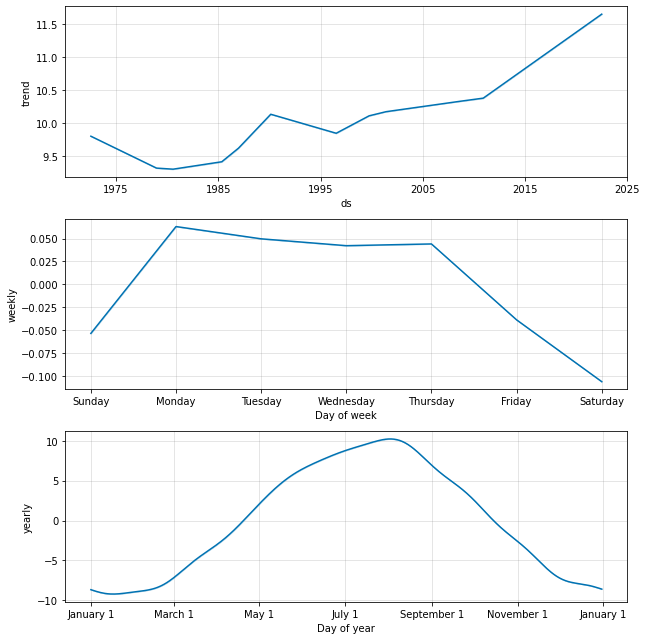

In [ ]:
fig2 = pr.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(pr, forecast)


In [ ]:
plot_components_plotly(pr, forecast)

In [ ]:
from prophet.diagnostics import cross_validation
#df_cv = cross_validation(pr, initial='730 days', period='180 days', horizon = '365 days')


  0%|          | 0/96 [00:00<?, ?it/s]

12:21:12 - cmdstanpy - INFO - Chain [1] start processing
12:21:12 - cmdstanpy - INFO - Chain [1] done processing
12:21:15 - cmdstanpy - INFO - Chain [1] start processing
12:21:15 - cmdstanpy - INFO - Chain [1] done processing
12:21:18 - cmdstanpy - INFO - Chain [1] start processing
12:21:18 - cmdstanpy - INFO - Chain [1] done processing
12:21:23 - cmdstanpy - INFO - Chain [1] start processing
12:21:23 - cmdstanpy - INFO - Chain [1] done processing
12:21:27 - cmdstanpy - INFO - Chain [1] start processing
12:21:27 - cmdstanpy - INFO - Chain [1] done processing
12:21:32 - cmdstanpy - INFO - Chain [1] start processing
12:21:32 - cmdstanpy - INFO - Chain [1] done processing
12:21:38 - cmdstanpy - INFO - Chain [1] start processing
12:21:38 - cmdstanpy - INFO - Chain [1] done processing
12:21:42 - cmdstanpy - INFO - Chain [1] start processing
12:21:43 - cmdstanpy - INFO - Chain [1] done processing
12:21:47 - cmdstanpy - INFO - Chain [1] start processing
12:21:47 - cmdstanpy - INFO - Chain [1]

KeyboardInterrupt: 

In [ ]:
df_auto = pd.read_csv("data/TG_STAID002759.txt", parse_dates=True)

NameError: name 'pd' is not defined

In [ ]:
df_auto.columns = ['1', 'ds', 'y', '2']

In [ ]:
df_auto.drop(['1', '2'], axis=1, inplace=True)

In [ ]:
df_auto['ds'] = pd.to_datetime(df_auto['ds'], format="%Y%m%d")
df_auto['y'] = df_auto['y'] * 0.1

In [ ]:
df_auto = df_auto[-5000:]

In [ ]:
import pmdarima as pm

In [ ]:
df_auto.index = df_auto['ds']

In [ ]:
df_auto.drop(['ds'], axis=1, inplace=True)

In [ ]:
df_auto

y
ds              
2008-10-22   9.8
2008-10-23   8.2
2008-10-24   6.8
2008-10-25   8.8
2008-10-26  10.5
...          ...
2022-06-26  26.3
2022-06-27  28.1
2022-06-28  21.4
2022-06-29  21.4
2022-06-30  23.3

[5000 rows x 1 columns]

In [ ]:
m = pm.auto_arima(df_auto['y'], 
                  seasonal=True, 
                  maxiter=100,
                  d=1,
                  p=3,
                  m=365,
                  D=1,
                  n_jobs=-1,
                  trace=True)

NameError: name 'pm' is not defined

In [ ]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1083.194
Date:                Thu, 11 Aug 2022   AIC                           2174.387
Time:                        17:40:01   BIC                           2191.238
Sample:                             0   HQIC                          2181.000
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8923      0.050     17.870      0.000       0.794       0.990
ar.L2         -0.2714      0.040     -6.782      0.000      -0.350      -0.193
ma.L1         -0.8635      0.040    -21.506      0.000      -0.942      -0.785
sigma2         4.4931      0.224     20.076      0.000       4.054       4.932
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.26
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df_auto['full_prediction_autoarima'] = m.predict_in_sample()

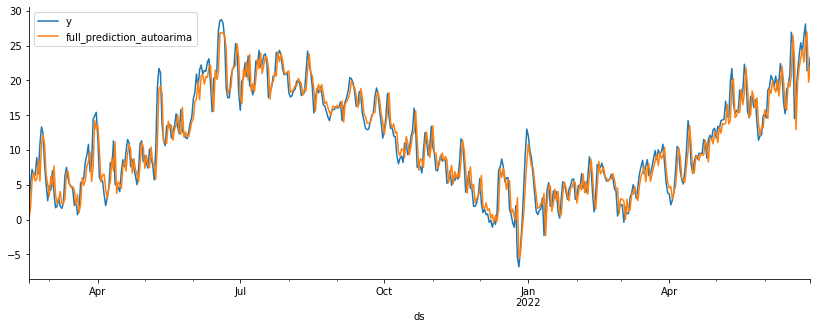

In [ ]:
import seaborn as sns
df_auto[['y', 'full_prediction_autoarima']].plot(figsize=(14,5),legend=True)
sns.despine()

In [ ]:
y_forecast, ci = m.predict(120, return_conf_int=True)

In [ ]:
y_forecast

array([23.6708671 , 23.48605627, 23.22048751, 23.03369087, 22.93910131,
       22.90540444, 22.90101244, 22.90624008, 22.91209673, 22.91590351,
       22.91771051, 22.91828956, 22.91831575, 22.91818195, 22.91805545,
       22.91797889, 22.91794492, 22.91793539, 22.9179361 , 22.91793933,
       22.91794202, 22.91794353, 22.91794416, 22.91794431, 22.91794427,
       22.9179442 , 22.91794414, 22.91794411, 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 ,
       22.9179441 , 22.9179441 , 22.9179441 , 22.9179441 , 22.91

In [ ]:
import numpy as np
timestamp = np.arange(len(df_auto) + len(y_forecast))

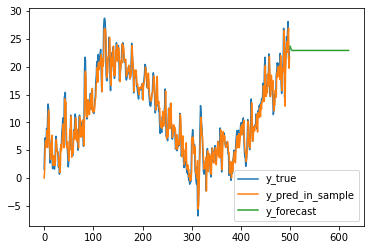

In [ ]:
plt.plot(timestamp[:len(df_auto)], df_auto['y'], label='y_true')
plt.plot(timestamp[:len(df_auto)], df_auto['full_prediction_autoarima'], label='y_pred_in_sample')
plt.plot(timestamp[len(df_auto):], y_forecast, label='y_forecast')
plt.legend()
None